# Bi-monthly Progress Report #2 January 2024 - SnowC2

In [87]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [11]:
path_ref = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run'
path_paul = '/home/lalandmi/Dropbox/data/SnowMIP/Paul/CLASS_Results'
path_scf_1 = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_SCF_1'
path_grass = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_grassC3'
path_ezero = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_EZERO_all'
path_bg = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_bg'
path_bg_scf_1 = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_bg_SCF_1'
path_soil = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_soil_lejeune2019'


label_ref = 'Ref'
ds_ref_d = xr.open_mfdataset(path_ref+'/*_daily.nc').squeeze().load()
ds_ref_hh = xr.open_mfdataset(path_ref+'/*_halfhourly.nc').squeeze().load()

label_paul = 'SnowMIP'
df_paul = pd.read_csv(path_paul+'/CLASS_sv_REF_cdp_1994_2014.txt', delim_whitespace=True)
df_paul.index = pd.to_datetime(df_paul[['year', 'month', 'day', 'hour']]).values
df_paul= df_paul.drop(columns=['year', 'month', 'day', 'hour'])
df_paul.albsn = df_paul.albsn.replace({0 : np.nan})
df_paul.albs = df_paul.albs.replace({0 : np.nan})
df_paul.tsn = df_paul.tsn.replace({-999 : np.nan})
df_paul.tsns = df_paul.tsns.replace({-999 : np.nan})
ds_paul_h = df_paul.to_xarray()
ds_paul_h= ds_paul_h.rename({'index': 'time'})
ds_paul_h.load()
ds_paul_d = ds_paul_h.resample(time='D').mean().load()


label_SCF_1 = 'SCF_1'
ds_SCF_1_d = xr.open_mfdataset(path_scf_1+'/*_daily.nc').squeeze().load()

label_grass = 'Grass C3'
ds_grass_d = xr.open_mfdataset(path_grass+'/*_daily.nc').squeeze().load()

label_ezero = 'EZERO'
ds_ezero_d = xr.open_mfdataset(path_ezero+'/*_daily.nc').squeeze().load()
ds_ezero_hh = xr.open_mfdataset(path_ezero+'/*_halfhourly.nc').squeeze().load()

label_bg = 'Bare ground'
ds_bg_d = xr.open_mfdataset(path_bg+'/*_daily.nc').squeeze().load()

label_bg_SCF_1 = 'Bare ground (SCF_1)'
ds_bg_SCF_1_d = xr.open_mfdataset(path_bg_scf_1+'/*_daily.nc').squeeze().load()

label_soil = 'Soil LJ19'
ds_soil_d = xr.open_mfdataset(path_soil+'/*_daily.nc').squeeze().load()


## Compare with obs

In [5]:
path_menard2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'
path_lejeune2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP'

ds_h_eval_menard2019 = xr.open_dataset(path_menard2019+'/obs_insitu_cdp_1994_2014.nc').load()
ds_d_eval_menard2019 = ds_h_eval_menard2019.resample(time='D').mean().load()
ds_h_eval_menard2019

<xarray.Dataset>
Dimensions:   (time: 175320, sdepth: 3)
Coordinates:
  * time      (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
  * sdepth    (sdepth) float32 0.1 0.2 0.5
Data variables:
    albs      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    snd_auto  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    snd_man   (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    snw_auto  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    snw_man   (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    ts        (time) float32 11.12 9.668 8.029 0.9937 ... 7.532 7.532 8.029
    tsl       (time, sdepth) float32 11.95 12.28 12.23 11.8 ... 12.95 12.83 12.8

In [6]:
ds_h_eval_lejeune2019 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.HourlySnow.nc').load()
# ds_d_eval_lejeune2019 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.MetSnowDaily.nc')
ds_d_eval_lejeune2019 = ds_h_eval_lejeune2019.resample(time='D').mean().load()
ds_h_eval_lejeune2019

<xarray.Dataset>
Dimensions:                   (time: 254208)
Coordinates:
  * time                      (time) datetime64[ns] 1993-08-01 ... 2022-07-31...
Data variables: (12/70)
    Soil_temperature_10cm     (time) float64 289.9 289.7 289.5 ... 292.2 291.9
    Soil_temperature_20cm     (time) float64 290.1 290.0 289.9 ... 291.6 291.6
    Soil_temperature_50cm     (time) float64 288.6 288.6 288.7 ... 290.1 290.2
    Runoff_5m2                (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Runoff_1m2                (time) float64 0.2 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snow_depth                (time) float64 nan nan nan nan ... 0.0 0.0 0.0 0.0
    ...                        ...
    Soil_moisture_10cm_2      (time) float64 nan nan nan ... 0.1284 0.128 0.1279
    Soil_moisture_10cm_3      (time) float64 nan nan nan ... 0.0606 0.0624
    Soil_moisture_20cm_1      (time) float64 nan nan nan ... 0.2251 0.2251 0.225
    Soil_moisture_20cm_2      (time) float64 nan nan nan ... 0.2104 0.2102 0.21
    Soil_moisture_30cm_1      (time) float64 nan nan nan ... 0.2498 0.2497
    Soil_moisture_30cm_2      (time) float64 nan nan nan ... 0.2918 0.2915
Attributes:
    history:  Thu Feb  9 11:25:20 2023: ncrcat CDP_hourly_19930801_20170731.n...
    NCO:      netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, C...

### SD

In [71]:
period = slice('1995-10','2013-06') # remove the first year

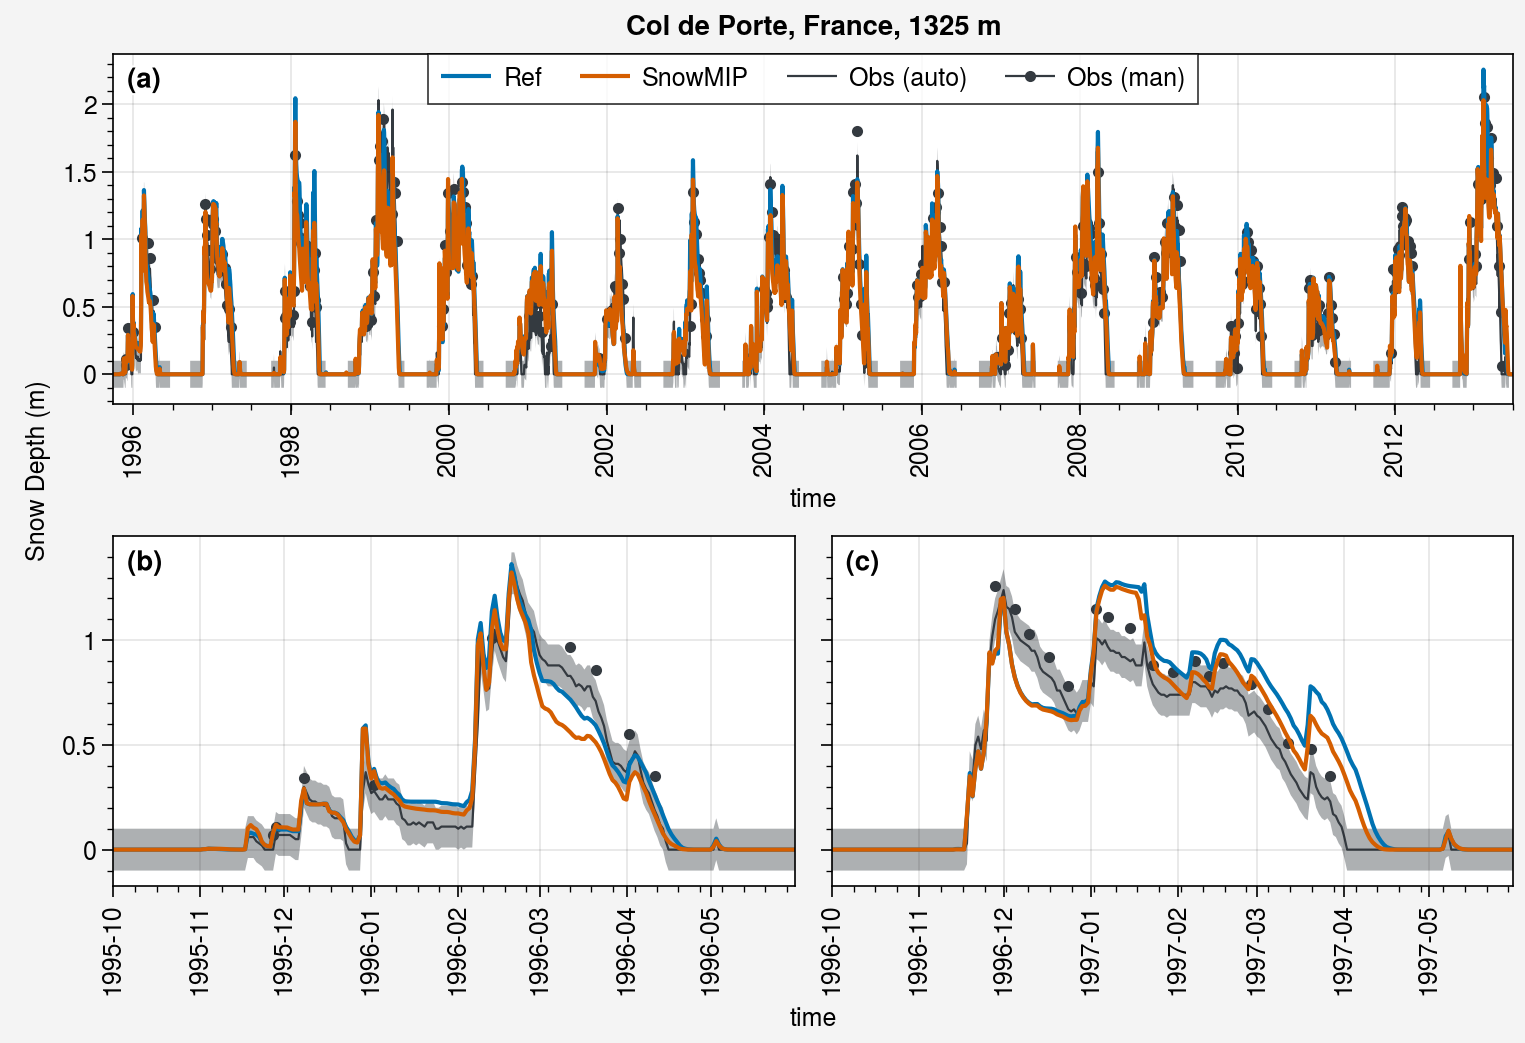

In [90]:
fig, axs = pplt.subplots([[1, 1], [2, 3]], refaspect=4, refwidth=7)

color_obs = 'gray8'

# Model 
axs[0].plot(ds_ref_d.snd.sel(time=period), label=label_ref)
axs[0].plot(ds_paul_d.snd.sel(time=period), label=label_paul)

# Obs
shadedata = np.concatenate((
    np.expand_dims(ds_d_eval_menard2019.snd_auto.sel(time=period).values+0.1, axis=0),
    np.expand_dims(ds_d_eval_menard2019.snd_auto.sel(time=period).values-0.1, axis=0),), axis=0)
axs[0].plot(ds_d_eval_menard2019.snd_auto.sel(time=period), shadedata=shadedata, color=color_obs, zorder=0, lw=0.8, label='Obs (auto)')
axs[0].plot(ds_d_eval_menard2019.snd_man.sel(time=period), marker='.', color=color_obs, zorder=0, lw=0.8, label='Obs (man)')

axs[0].format(ylabel='Snow Depth (m)')
axs[0].legend(ncols=4)


for i, p in enumerate([slice('1995-10', '1996-05'), slice('1996-10', '1997-05')]):
    # Model 
    axs[i+1].plot(ds_ref_d.snd.sel(time=p), label=label_ref)
    axs[i+1].plot(ds_paul_d.snd.sel(time=p), label=label_paul)
    
    # Obs
    shadedata = np.concatenate((
        np.expand_dims(ds_d_eval_menard2019.snd_auto.sel(time=p).values+0.1, axis=0),
        np.expand_dims(ds_d_eval_menard2019.snd_auto.sel(time=p).values-0.1, axis=0),), axis=0)
    axs[i+1].plot(ds_d_eval_menard2019.snd_auto.sel(time=p), shadedata=shadedata, color=color_obs, zorder=0, lw=0.8, label='Obs (auto)')
    axs[i+1].plot(ds_d_eval_menard2019.snd_man.sel(time=p), marker='.', color=color_obs, zorder=0, lw=0.8, label='Obs (man)')

fig.format(abc='(a)', abcloc='ul')

fig.suptitle('Col de Porte, France, 1325 m')
fig.save('img/sd_cdp.jpg')

### Annual cycles

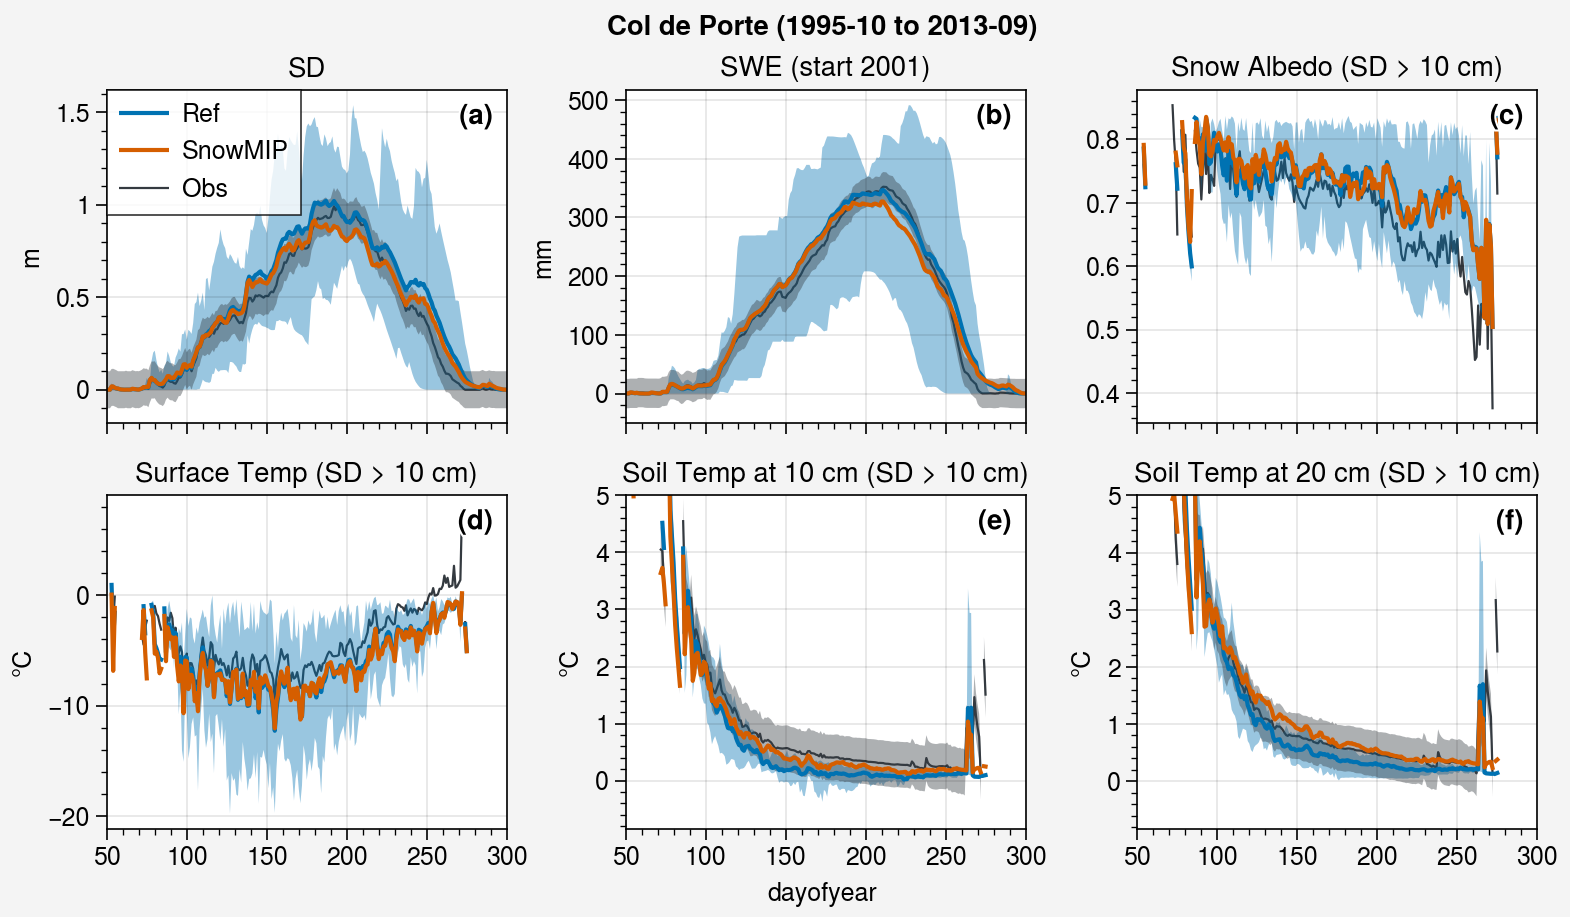

In [106]:
import warnings
warnings.filterwarnings("ignore")

color_obs = 'gray8'

fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth=2, refaspect=1.2, sharey=0)

doy = 140
period = slice('1995-10', '2013-09')

ax = axs[0]
mask_obs = ~ds_d_eval_menard2019.snd_auto.sel(time=period).isnull()
shadedata = ds_ref_d.snd.sel(time=period).where(mask_obs).groupby('time.dayofyear').quantile([0.1, 0.9]).sel(dayofyear=slice(1,365)).roll(dayofyear=doy).transpose('quantile', 'dayofyear')
h1 = ax.plot(ds_ref_d.snd.sel(time=period).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy), shadedata=shadedata, label=label_ref)
h2 = ax.plot(ds_paul_d.snd.sel(time=period).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy), label=label_paul)

obs = ds_d_eval_menard2019.snd_auto.sel(time=period).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)
shadedata = np.concatenate((np.expand_dims(obs.values+0.1, axis=0), np.expand_dims(obs.values-0.1, axis=0),), axis=0)
h3 = ax.plot(obs, shadedata=shadedata, label='Obs', color=color_obs, lw=0.8, zorder=0)
ax.format(title='SD', ylabel='m')
ax.legend([h1, h2, h3], loc='ul', ncols=1)


ax = axs[1]
mask_obs = ~ds_d_eval_menard2019.snw_auto.sel(time=period).isnull()
shadedata = ds_ref_d.snw.sel(time=period).where(mask_obs).groupby('time.dayofyear').quantile([0.1, 0.9]).sel(dayofyear=slice(1,365)).roll(dayofyear=doy).transpose('quantile', 'dayofyear')
ax.plot(ds_ref_d.snw.sel(time=period).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy), shadedata=shadedata)
ax.plot(ds_paul_d.snw.sel(time=period).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy))

obs = ds_d_eval_menard2019.snw_auto.sel(time=period).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)
shadedata = np.concatenate((np.expand_dims(obs.values+25, axis=0), np.expand_dims(obs.values-25, axis=0),), axis=0)
ax.plot(obs, shadedata=shadedata, color=color_obs, lw=0.8, zorder=0)
ax.format(title='SWE (start 2001)', ylabel='mm')


ax = axs[2]
mask_obs = ~ds_d_eval_menard2019.albs.where(ds_d_eval_menard2019.snd_auto > 0.1).isnull()
shadedata = ds_ref_d.albsn.where(ds_paul_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').quantile([0.1, 0.9]).sel(dayofyear=slice(1,365)).roll(dayofyear=doy).transpose('quantile', 'dayofyear')
ax.plot(ds_ref_d.albsn.where(ds_paul_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy), shadedata=shadedata)
ax.plot(ds_paul_d.albsn.where(ds_paul_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy))

ax.plot(ds_d_eval_menard2019.albs.where(ds_d_eval_menard2019.snd_auto > 0.1).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy).squeeze(), color=color_obs, lw=0.8, zorder=0)
ax.format(title='Snow Albedo (SD > 10 cm)', ylabel='')


ax = axs[3]
mask_obs = ~ds_d_eval_menard2019.ts.where(ds_d_eval_menard2019.snd_auto > 0.1).isnull()
shadedata = ds_ref_d.ts.where(ds_ref_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').quantile([0.1, 0.9]).sel(dayofyear=slice(1,365)).roll(dayofyear=doy).transpose('quantile', 'dayofyear')-273.15
ax.plot(ds_ref_d.ts.where(ds_ref_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)-273.15, shadedata=shadedata)
ax.plot(ds_paul_d.ts.where(ds_paul_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)-273.15)

ax.plot(ds_d_eval_menard2019.ts.where(ds_d_eval_menard2019.snd_auto > 0.1).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy), color=color_obs, lw=0.8, zorder=0)
ax.format(title='Surface Temp (SD > 10 cm)', ylabel='°C')

# three standard soil layers in CLASS of thickness 0.1, 0.25 and 3.75 m
ax = axs[4]
mask_obs = ~ds_d_eval_menard2019.tsl.sel(sdepth=0.1).where(ds_d_eval_menard2019.snd_auto > 0.1).isnull()
shadedata = ((ds_ref_d.tsl.sel(layer=1)+ds_ref_d.tsl.sel(layer=2))/2).where(ds_ref_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').quantile([0.1, 0.9]).sel(dayofyear=slice(1,365)).roll(dayofyear=doy).squeeze().transpose('quantile', 'dayofyear')-273.15
ax.plot(((ds_ref_d.tsl.sel(layer=1)+ds_ref_d.tsl.sel(layer=2))/2).where(ds_ref_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)-273.15, shadedata=shadedata)
ax.plot((0.6*ds_paul_d['tsl:1']+0.4*ds_paul_d['tsl:2']).where(ds_paul_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)-273.15)

obs = ds_d_eval_menard2019.tsl.sel(sdepth=0.1).where(ds_d_eval_menard2019.snd_auto > 0.1).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)
shadedata = np.concatenate((np.expand_dims(obs.values+0.4, axis=0), np.expand_dims(obs.values-0.4, axis=0),), axis=0)
ax.plot(ds_d_eval_menard2019.tsl.sel(sdepth=0.1).where(ds_d_eval_menard2019.snd_auto > 0.1).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy), shadedata=shadedata, color=color_obs, lw=0.8, zorder=0)
ax.format(title='Soil Temp at 10 cm (SD > 10 cm)', ylabel='°C', ymax=5)


ax = axs[5]
mask_obs = ~ds_d_eval_menard2019.tsl.sel(sdepth=0.2).where(ds_d_eval_menard2019.snd_auto > 0.1).isnull()
shadedata = ((ds_ref_d.tsl.sel(layer=2)+ds_ref_d.tsl.sel(layer=3))/2).where(ds_ref_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').quantile([0.1, 0.9]).sel(dayofyear=slice(1,365)).roll(dayofyear=doy).squeeze().transpose('quantile', 'dayofyear')-273.15
ax.plot(((ds_ref_d.tsl.sel(layer=2)+ds_ref_d.tsl.sel(layer=3))/2).where(ds_ref_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)-273.15, shadedata=shadedata)
ax.plot(ds_paul_d['tsl:2'].where(ds_paul_d.snd > 0.1).where(mask_obs).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy).squeeze()-273.15)

obs = ds_d_eval_menard2019.tsl.sel(sdepth=0.2).where(ds_d_eval_menard2019.snd_auto > 0.1).groupby('time.dayofyear').mean().sel(dayofyear=slice(1,365)).roll(dayofyear=doy)
shadedata = np.concatenate((np.expand_dims(obs.values+0.4, axis=0), np.expand_dims(obs.values-0.4, axis=0),), axis=0)
ax.plot(obs, shadedata=shadedata, color=color_obs, lw=0.8, zorder=0)
ax.format(title='Soil Temp at 20 cm (SD > 10 cm)', ylabel='°C', ymax=5)


for ax in axs:
    ax.format(xlim=(50,300))

fig.suptitle('Col de Porte ('+period.start+' to '+period.stop+')')
fig.format(abcloc='ur')
fig.save('img/ac_cdp.jpg')


### Snow profiles

Not easy to say if our forcing data are in local time and need to convert here or not...

In [107]:
from snowpyt import pit_class as pc

Theoric snow temperature within CLASSIC: https://cccma.gitlab.io/classic/snowHeatCond_8f90.html#details

In [109]:
import os

def sorted_directory_listing_with_os_listdir(directory):
    items = os.listdir(directory)
    sorted_items = sorted(items)
    return sorted_items

In [110]:
mypath = path_lejeune2019+'/CRYOBSCLIM.CDP.2018.SnowProfile/SnowProfile/'
files = sorted_directory_listing_with_os_listdir(mypath)

In [111]:
tsn_obs = []
date_obs = []
for file in files:
    p = pc.Snowpit()
    p.caaml_file = path_lejeune2019+'/CRYOBSCLIM.CDP.2018.SnowProfile/SnowProfile/'+file
    p.import_caamlv6(print2term=False)
    try:
        tsn_obs.append(np.trapz(p.temperature_profile.temp, x=-p.temperature_profile.depth)/p.temperature_profile.depth[0])
    except AttributeError:
        tsn_obs.append(np.nan)
    date_obs.append(p.metadata.date)
    # p.plot(plot_order=['density', 'temperature', 'stratigraphy', 'hardness'])

In [112]:
d = {'tsn': tsn_obs}
df_tsn = pd.DataFrame(data=d, index=pd.to_datetime(date_obs).tz_localize(None))
df_tsn = df_tsn.dropna()
ds_h_tsn_lejeune2019 = df_tsn.to_xarray()
ds_h_tsn_lejeune2019 = ds_h_tsn_lejeune2019.rename({'index': 'time'})
ds_h_tsn_lejeune2019 = ds_h_tsn_lejeune2019.reindex({'time': pd.date_range(ds_h_tsn_lejeune2019.tsn.time[0].values, ds_h_tsn_lejeune2019.tsn.time[-1].values, freq='H')})

## Metrics

## Time series

In [113]:
def mb(simu, obs):
    return (simu-obs).mean().values.item(0)

def rmb(simu, obs):
    return ((simu-obs).mean()/np.abs(obs.mean())).values.item(0)*100
    
def mab(simu, obs):
    return (np.abs(simu-obs)).mean().values.item(0)

def rmab(simu, obs):
    return ((np.abs(simu-obs)).mean()/np.abs(obs.mean())).values.item(0)*100
    
def rmse(simu, obs):
    return np.sqrt(((simu-obs)**2).mean()).values.item(0)

def rrmse(simu, obs):
    return (np.sqrt(((simu-obs)**2).mean())/np.abs(obs.mean())).values.item(0)*100
    
def corr(simu, obs):
    return xr.corr(simu, obs).values.item(0)

In [114]:
def mb_a(simu, obs):
    return (simu-obs).mean()

def rmb_a(simu, obs):
    return ((simu-obs).mean()/np.abs(obs.mean()))*100
    
def mab_a(simu, obs):
    return (np.abs(simu-obs)).mean()

def rmab_a(simu, obs):
    return ((np.abs(simu-obs)).mean()/np.abs(obs.mean()))*100
    
def rmse_a(simu, obs):
    return np.sqrt(((simu-obs)**2).mean())

def rrmse_a(simu, obs):
    return (np.sqrt(((simu-obs)**2).mean())/np.abs(obs.mean()))*100
    
def corr_a(simu, obs):
    r, _ = stats.pearsonr(simu, obs)
    return r

In [166]:
column_indexes = ['mb', 'rmb', 'mab', 'rmab', 'rmse', 'rrmse', 'r', 'stdd']

row_indexes = [['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts', 'tsl_10', 'tsl_20', 'tsl_50', 'tsn', 'SCD'], ['obs', 'ref', 'paul', 'scf_1', 'grass', 'ezero', 'bg', 'bg_scf_1', 'soil']]
rows = pd.MultiIndex.from_product(row_indexes)

df_metrics = pd.DataFrame(index=rows, columns=column_indexes)
df_metrics

mb  rmb  mab rmab rmse rrmse    r stdd
snd_auto obs       NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         ref       NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         paul      NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         scf_1     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         grass     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
...                ...  ...  ...  ...  ...   ...  ...  ...
SCD      grass     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         ezero     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         bg        NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         bg_scf_1  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN
         soil      NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN

[99 rows x 8 columns]

In [ ]:
ds_grass_d.alb

In [223]:
for var in ['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts']:
    for exp, ds_simu in zip(['obs', 'ref', 'paul', 'scf_1', 'grass', 'ezero', 'bg', 'bg_scf_1', 'soil'],
                  [ds_d_eval_menard2019, ds_ref_d, ds_paul_d, ds_SCF_1_d, ds_grass_d, ds_ezero_d, ds_bg_d, ds_bg_SCF_1_d, ds_soil_d]):
        
        obs = ds_d_eval_menard2019[var].where(ds_d_eval_menard2019.snd_auto > 0.1)
        if exp == 'obs':
            simu = obs
        else:
            if var in ['snd_auto', 'snd_man']:
                simu = ds_simu.snd.where(ds_simu.snd > 0.1)
            elif var in ['snw_auto', 'snw_man']:
                simu = ds_simu.snw.where(ds_simu.snd > 0.1)
            elif var == 'ts':
                simu = ds_simu[var].where(ds_simu.snd > 0.1) - 273.15
            elif var == 'albs':
                simu = ds_simu['albsn'].where(ds_simu.snd > 0.1)
            else:
                simu = ds_simu[var].where(ds_simu.snd > 0.1)

        df_metrics.loc[(var, exp), 'mb'] = mb(simu, obs)
        df_metrics.loc[(var, exp), 'rmb'] = rmb(simu, obs)
        df_metrics.loc[(var, exp), 'mab'] = mab(simu, obs)
        df_metrics.loc[(var, exp), 'rmab'] = rmab(simu, obs)
        df_metrics.loc[(var, exp), 'rmse'] = rmse(simu, obs)
        df_metrics.loc[(var, exp), 'rrmse'] = rrmse(simu, obs)
        df_metrics.loc[(var, exp), 'r'] = corr(simu, obs)
        df_metrics.loc[(var, exp), 'stdd'] = simu.std().values.item(0)

In [246]:
for var in ['tsl_10', 'tsl_20', 'tsl_50']:
    for exp, ds_simu in zip(['obs', 'ref', 'paul', 'scf_1', 'grass', 'ezero', 'bg', 'bg_scf_1', 'soil'],
                  [ds_d_eval_menard2019, ds_ref_d, ds_paul_d, ds_SCF_1_d, ds_grass_d, ds_ezero_d, ds_bg_d, ds_bg_SCF_1_d, ds_soil_d]):

        if var == 'tsl_10':
            obs = ds_d_eval_menard2019.tsl.sel(sdepth=0.1).where(ds_d_eval_menard2019.snd_auto > 0.1)
            if exp == 'obs':
                simu = obs
            elif exp == 'paul':
                simu = (0.6*ds_simu['tsl:1']+0.4*ds_simu['tsl:2']).where(ds_simu.snd > 0.1)-273.15
            else:
                simu = ((ds_simu.tsl.sel(layer=1)+ds_simu.tsl.sel(layer=2))/2).where(ds_simu.snd > 0.1)-273.15
        elif var == 'tsl_20':
            obs = ds_d_eval_menard2019.tsl.sel(sdepth=0.2).where(ds_d_eval_menard2019.snd_auto > 0.1)
            if exp == 'obs':
                simu = obs
            elif exp == 'paul':
                simu = ds_simu['tsl:2'].where(ds_simu.snd > 0.1)-273.15
            else:
                simu = ((ds_simu.tsl.sel(layer=2)+ds_simu.tsl.sel(layer=3))/2).where(ds_simu.snd > 0.1)-273.15
        elif var == 'tsl_50':
            obs = ds_d_eval_menard2019.tsl.sel(sdepth=0.5).where(ds_d_eval_menard2019.snd_auto > 0.1)
            if exp == 'obs':
                simu = obs
            elif exp == 'paul':
                simu = ds_simu['tsl:3'].where(ds_simu.snd > 0.1)-273.15
            else:
                simu = ((ds_simu.tsl.sel(layer=5)+ds_simu.tsl.sel(layer=6))/2).where(ds_simu.snd > 0.1)-273.15

        df_metrics.loc[(var, exp), 'mb'] = mb(simu, obs)
        df_metrics.loc[(var, exp), 'rmb'] = rmb(simu, obs)
        df_metrics.loc[(var, exp), 'mab'] = mab(simu, obs)
        df_metrics.loc[(var, exp), 'rmab'] = rmab(simu, obs)
        df_metrics.loc[(var, exp), 'rmse'] = rmse(simu, obs)
        df_metrics.loc[(var, exp), 'rrmse'] = rrmse(simu, obs)
        df_metrics.loc[(var, exp), 'r'] = corr(simu, obs)
        df_metrics.loc[(var, exp), 'stdd'] = simu.std().values.item(0)

In [234]:
for var in ['tsn']:
    for exp, ds_simu in zip(['obs', 'ref', 'ezero'],
                  [ds_h_tsn_lejeune2019, ds_ref_hh, ds_ezero_hh]):

        obs = ds_h_tsn_lejeune2019.tsn
        if exp == 'obs':
            simu = obs
        else:
            simu = ds_simu.tsn

        df_metrics.loc[(var, exp), 'mb'] = mb(simu, obs)
        df_metrics.loc[(var, exp), 'rmb'] = rmb(simu, obs)
        df_metrics.loc[(var, exp), 'mab'] = mab(simu, obs)
        df_metrics.loc[(var, exp), 'rmab'] = rmab(simu, obs)
        df_metrics.loc[(var, exp), 'rmse'] = rmse(simu, obs)
        df_metrics.loc[(var, exp), 'rrmse'] = rrmse(simu, obs)
        df_metrics.loc[(var, exp), 'r'] = corr(simu, obs)
        df_metrics.loc[(var, exp), 'stdd'] = simu.std().values.item(0)

In [370]:
for var in ['SCD']:
    for exp, ds_simu in zip(['obs', 'ref', 'paul', 'scf_1', 'grass', 'ezero', 'bg', 'bg_scf_1', 'soil'],
                  [ds_d_eval_menard2019, ds_ref_d, ds_paul_d, ds_SCF_1_d, ds_grass_d, ds_ezero_d, ds_bg_d, ds_bg_SCF_1_d, ds_soil_d]):

        obs = ds_d_eval_menard2019.snd_auto
        if exp == 'obs':
            simu = obs
        else:
            simu = ds_simu.snd

        SCD_obs = []; SCD_simu = []

        # 2008 because the bg_scf_1 crashed after that
        for year in pplt.arange(1995, 2007):
            SCD_obs.append(obs.sel(time=str(year)).where(obs.sel(time=str(year)) >  0.1).count().values.item(0))
            SCD_simu.append(simu.sel(time=str(year)).where(simu.sel(time=str(year)) >  0.1).count().values.item(0))

        SCD_obs = np.array(SCD_obs)
        SCD_simu = np.array(SCD_simu)

        df_metrics.loc[(var, exp), 'mb'] = mb_a(SCD_simu, SCD_obs)
        df_metrics.loc[(var, exp), 'rmb'] = rmb_a(SCD_simu, SCD_obs)
        df_metrics.loc[(var, exp), 'mab'] = mab_a(SCD_simu, SCD_obs)
        df_metrics.loc[(var, exp), 'rmab'] = rmab_a(SCD_simu, SCD_obs)
        df_metrics.loc[(var, exp), 'rmse'] = rmse_a(SCD_simu, SCD_obs)
        df_metrics.loc[(var, exp), 'rrmse'] = rrmse_a(SCD_simu, SCD_obs)
        df_metrics.loc[(var, exp), 'r'] = corr_a(SCD_simu, SCD_obs)
        df_metrics.loc[(var, exp), 'stdd'] = SCD_simu.std()

In [371]:
# for var in ['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts']:
for var in ['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts', 'tsl_10', 'tsl_20', 'tsl_50', 'tsn', 'SCD']:
    print()
    print(var)
    print(df_metrics.loc[var])


snd_auto
                mb        rmb       mab       rmab      rmse      rrmse  \
obs            0.0        0.0       0.0        0.0       0.0        0.0   
ref       0.087628  12.674578   0.15941  23.057058  0.207805  30.056886   
paul      0.009846   1.424197  0.138836   20.08126   0.17702  25.604197   
scf_1     0.081005  11.716538  0.158198  22.881717  0.207117  29.957389   
grass     0.093378  13.506185  0.161964   23.42646  0.212195  30.691898   
ezero    -0.020133  -2.912083  0.133489  19.307854  0.176771  25.568258   
bg        0.080354  11.622416   0.15569  22.519047   0.20463  29.597774   
bg_scf_1  0.082383   11.91591   0.17197  24.873736  0.222117  32.127033   
soil      0.091815  13.280175  0.159926  23.131727  0.209189  30.257109   

                 r      stdd  
obs            1.0  0.393558  
ref       0.886143  0.409659  
paul      0.893366   0.35925  
scf_1      0.88383  0.410592  
grass     0.884065  0.412035  
ezero     0.895948  0.381623  
bg        0.885114  0.

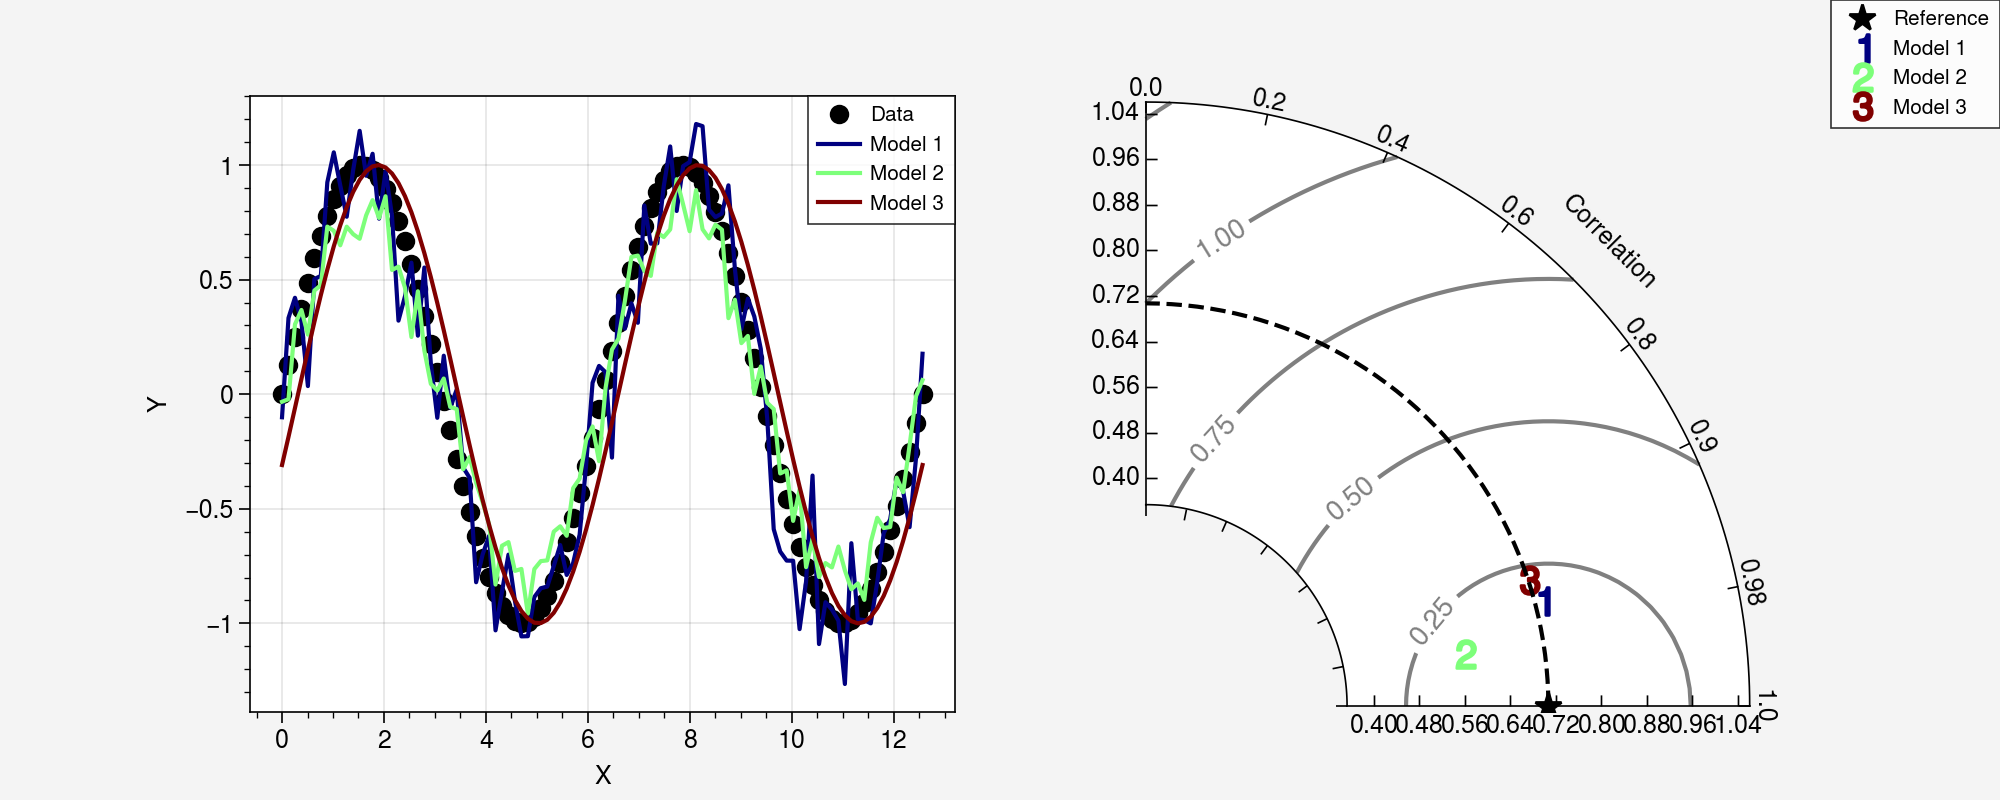

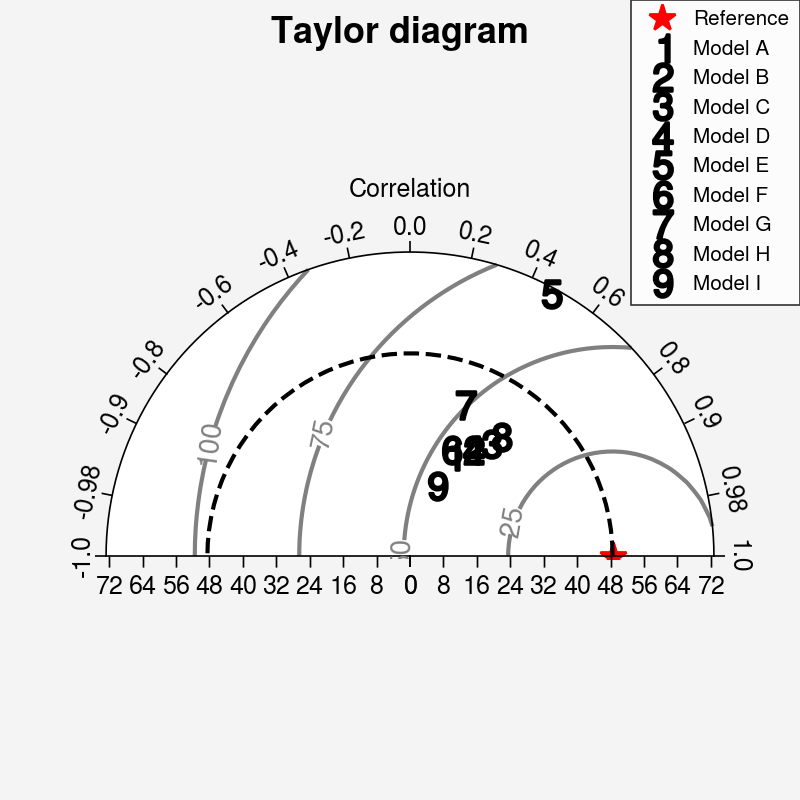

In [115]:
#!/usr/bin/env python
# Copyright: This document has been placed in the public domain.

"""
Taylor diagram (Taylor, 2001) implementation.

Note: If you have found these software useful for your research, I would
appreciate an acknowledgment.
"""

__version__ = "Time-stamp: <2018-12-06 11:43:41 ycopin>"
__author__ = "Yannick Copin <yannick.copin@laposte.net>"

import numpy as NP
import matplotlib.pyplot as PLT


class TaylorDiagram(object):
    """
    Taylor diagram.

    Plot model standard deviation and correlation to reference (data)
    sample in a single-quadrant polar plot, with r=stddev and
    theta=arccos(correlation).
    """

    def __init__(self, refstd,
                 fig=None, rect=111, label='_', srange=(0, 1.5), extend=False):
        """
        Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using `mpl_toolkits.axisartist.floating_axes`.

        Parameters:

        * refstd: reference standard deviation to be compared to
        * fig: input Figure or None
        * rect: subplot definition
        * label: reference label
        * srange: stddev axis extension, in units of *refstd*
        * extend: extend diagram to negative correlations
        """

        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd            # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
#         rlocs = NP.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])
        rlocs = NP.array([0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.98, 1])
        if extend:
            # Diagram extended to negative correlations
            self.tmax = NP.pi
            rlocs = NP.concatenate((-rlocs[:0:-1], rlocs))
        else:
            # Diagram limited to positive correlations
            self.tmax = NP.pi/2
        tlocs = NP.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent (in units of reference stddev)
        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = PLT.figure()
        
        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
#         ax.axis["left"].label.set_text("Standard Deviation")

        ax.axis["right"].set_axis_direction("top")    # "Y-axis"
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)          # Unused

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and stddev contour
        l, = self.ax.plot([0], self.refstd, 'k*',
                          ls='', ms=10, label=label)
        t = NP.linspace(0, self.tmax)
        r = NP.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """
        Add sample (*stddev*, *corrcoeff*) to the Taylor
        diagram. *args* and *kwargs* are directly propagated to the
        `Figure.plot` command.
        """

        l, = self.ax.plot(NP.arccos(corrcoef), stddev,
                          *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)

        return l

    def add_grid(self, *args, **kwargs):
        """Add a grid."""

        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        """
        Add constant centered RMS difference contours, defined by *levels*.
        """

        rs, ts = NP.meshgrid(NP.linspace(self.smin, self.smax),
                             NP.linspace(0, self.tmax))
        # Compute centered RMS difference
        rms = NP.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*NP.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours


def test1():
    """Display a Taylor diagram in a separate axis."""

    # Reference dataset
    x = NP.linspace(0, 4*NP.pi, 100)
    data = NP.sin(x)
    refstd = data.std(ddof=1)           # Reference standard deviation

    # Generate models
    m1 = data + 0.2*NP.random.randn(len(x))     # Model 1
    m2 = 0.8*data + .1*NP.random.randn(len(x))  # Model 2
    m3 = NP.sin(x-NP.pi/10)                     # Model 3

    # Compute stddev and correlation coefficient of models
    samples = NP.array([ [m.std(ddof=1), NP.corrcoef(data, m)[0, 1]]
                         for m in (m1, m2, m3)])

    fig = PLT.figure(figsize=(10, 4))

    ax1 = fig.add_subplot(1, 2, 1, xlabel='X', ylabel='Y')
    # Taylor diagram
#     dia = TaylorDiagram(refstd, fig=fig, rect=(1, 2, 2), label="Reference",
    dia = TaylorDiagram(refstd, fig=fig, rect=122, label="Reference",
                        srange=(0.5, 1.5))

    colors = PLT.matplotlib.cm.jet(NP.linspace(0, 1, len(samples)))

    ax1.plot(x, data, 'ko', label='Data')
    for i, m in enumerate([m1, m2, m3]):
        ax1.plot(x, m, c=colors[i], label='Model %d' % (i+1))
    ax1.legend(numpoints=1, prop=dict(size='small'), loc='best')

    # Add the models to Taylor diagram
    for i, (stddev, corrcoef) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc=colors[i], mec=colors[i],
                       label="Model %d" % (i+1))

    # Add grid
    dia.add_grid()

    # Add RMS contours, and label them
    contours = dia.add_contours(colors='0.5')
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.2f')

    # Add a figure legend
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right')

    return dia


def test2():
    """
    Climatology-oriented example (after iteration w/ Michael A. Rawlins).
    """

    # Reference std
    stdref = 48.491

    # Samples std,rho,name
    samples = [[25.939, 0.385, "Model A"],
               [29.593, 0.509, "Model B"],
               [33.125, 0.585, "Model C"],
               [29.593, 0.509, "Model D"],
               [71.215, 0.473, "Model E"],
               [27.062, 0.360, "Model F"],
               [38.449, 0.342, "Model G"],
               [35.807, 0.609, "Model H"],
               [17.831, 0.360, "Model I"]]

    fig = PLT.figure()

    dia = TaylorDiagram(stdref, fig=fig, label='Reference', extend=True)
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

    # Add models to Taylor diagram
    for i, (stddev, corrcoef, name) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc='k', mec='k',
                       label=name)

    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.0f')

    dia.add_grid()                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward

    # Add a figure legend and title
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right')
    fig.suptitle("Taylor diagram", size='x-large')  # Figure title

    return dia


if __name__ == '__main__':

    dia = test1()
    dia = test2()

    PLT.show()

In [225]:
df_metrics.loc['albs']

,mb,rmb,mab,rmab,rmse,rrmse,r,stdd
obs,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.09762
ref,0.038959,5.653266,0.063618,9.231551,0.083128,12.06263,0.688567,0.096645
paul,0.041057,5.957811,0.06701,9.723761,0.085943,12.471198,0.680164,0.094836
scf_1,0.039211,5.68984,0.063712,9.245173,0.083232,12.077701,0.686888,0.096058
grass,0.042497,6.166693,0.064146,9.308165,0.083401,12.102306,0.704346,0.09814
ezero,0.029492,4.27955,0.062858,9.121345,0.081583,11.8384,0.667719,0.09504
bg,0.037407,5.42807,0.063652,9.236505,0.083017,12.046581,0.682245,0.095988
bg_scf_1,0.037437,5.43249,0.063915,9.274731,0.08387,12.170292,0.680283,0.09646
soil,0.039243,5.694491,0.063648,9.235908,0.083152,12.06619,0.690226,0.096852


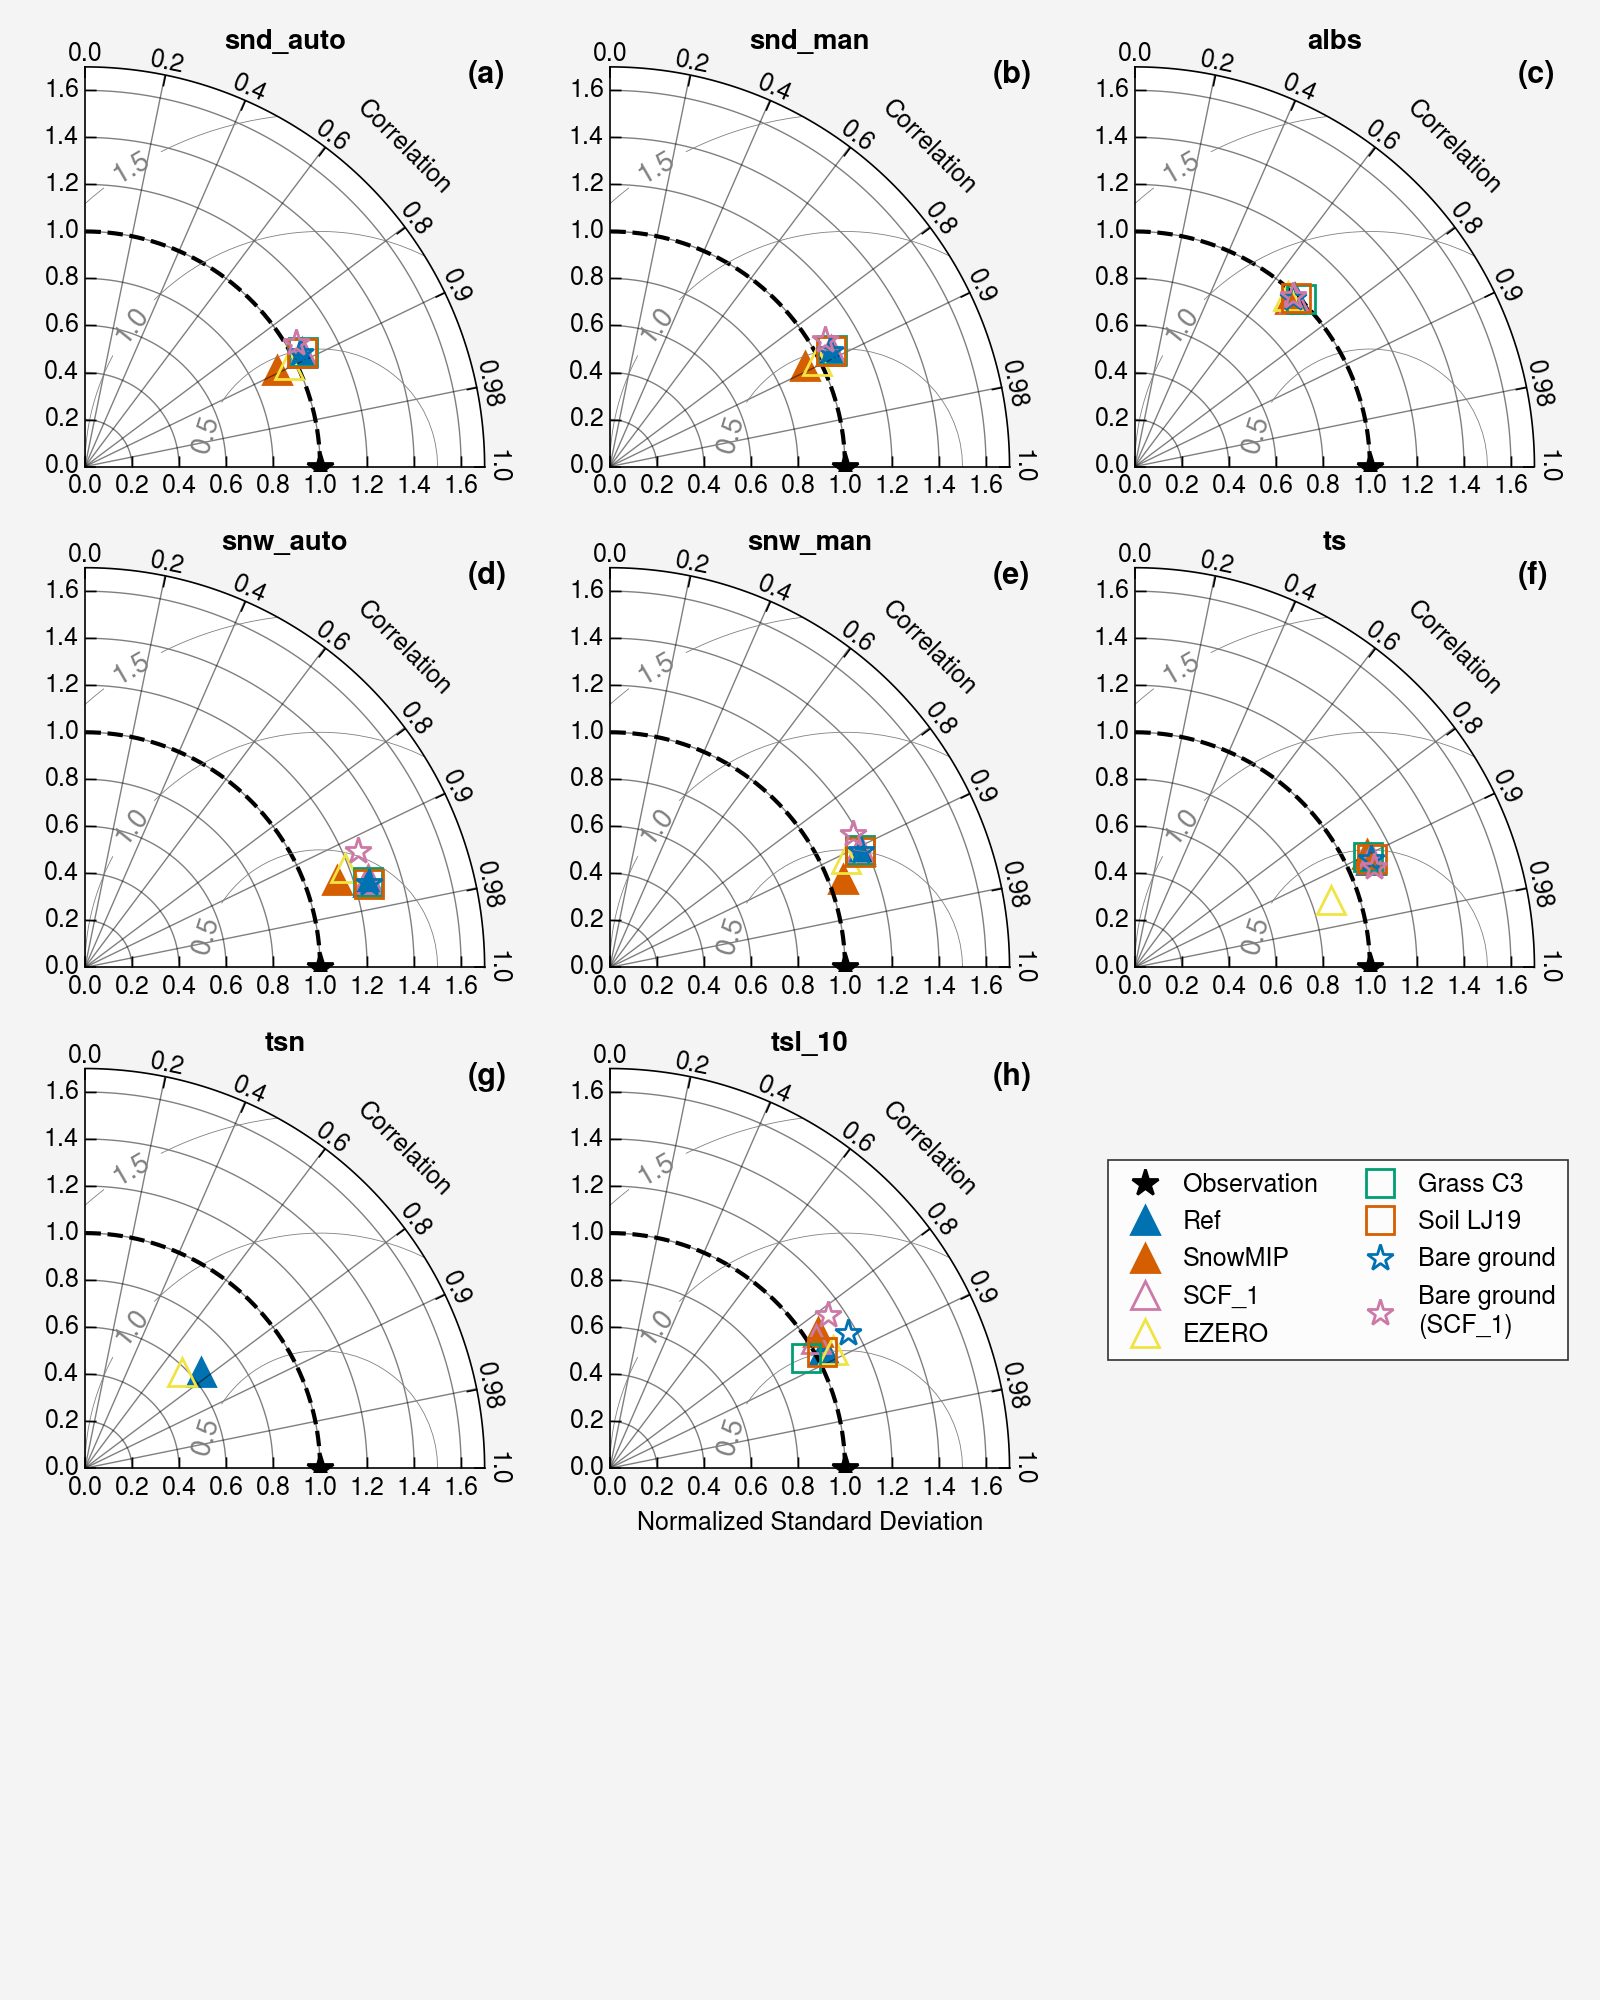

In [272]:
# n = 5
# marker = ['o']*n + ['P']*n + ['s']*n + ['^']*n + ['*']*n + ['x']*n + ['D']*n
# mec = ['C'+str(i) for i in range(n)]*6
# mfc = ['C'+str(i) for i in range(n)]*2 + [(0, 0, 0, 0)]*30

marker = ['^']*2 + ['^']*2 + ['s']*2 + ['*']*2
mec = ['C0', 'C1', 'C3', 'C4', 'C2', 'C1', 'C0', 'C3']
mfc = ['C0', 'C1', (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]

# list_var = ['snd_auto', 'snd_man']
# list_var = ['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts', 'tsl_10', 'tsl_20', 'tsl_50', 'tsn', 'SCD']
# list_var = ['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts']
list_var = ['snd_auto', 'snd_man', 'albs', 'snw_auto', 'snw_man', 'ts', 'tsn', 'tsl_10']
list_exp = ['ref', 'paul', 'scf_1', 'ezero', 'grass', 'soil', 'bg', 'bg_scf_1']
list_labels = [label_ref, label_paul, label_SCF_1, label_ezero, label_grass, label_soil, label_bg, 'Bare ground\n(SCF_1)']
rects = [431, 432, 433, 434, 435, 436, 437, 438]
abc = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']
srange = [(0, 1.7)]*len(rects)

# fig = PLT.figure(figsize=(8,10))
fig = PLT.figure(figsize=(8,10))

for i, var in enumerate(list_var):    
    dia = TaylorDiagram(df_metrics.loc[(var, 'obs'), 'stdd']/df_metrics.loc[(var, 'obs'), 'stdd'], fig=fig, rect=rects[i], 
                        label='Observation', srange=srange[i], extend=False)
    
    for j, exp in enumerate(list_exp):
        dia.add_sample(df_metrics.loc[(var, exp), 'stdd']/df_metrics.loc[(var, 'obs'), 'stdd'], df_metrics.loc[(var, exp), 'r'], 
                       marker=marker[j], ms=10, ls='', mfc=mfc[j], mec=mec[j],label=list_labels[j], zorder=j)    

        
    dia._ax.set_title(list_var[i], fontweight="bold")
    dia._ax.text(0.95, 0.95, abc[i], size=11, weight='bold', transform=dia._ax.transAxes)
    
    # Add RMS contours, and label them
    contours = dia.add_contours(levels=3, colors='0.5', linewidths=0.3)  # 5 levels in grey
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
    
    # Grid
    dia._ax.grid(lw=0.5, alpha=0.5)
    if i in [7]: dia._ax.axis["left"].label.set_text("Normalized Standard Deviation")


fig.legend(dia.samplePoints,
           [ p.get_label() for p in dia.samplePoints ],
           # numpoints=1, bbox_to_anchor=(0.98, 0.47), ncol=2)
           numpoints=1, bbox_to_anchor=(0.98, 0.42), ncol=2)

# fig.suptitle("Taylor diagram of spatial climatologies "+str(period.start)+"-"+period.stop, size='x-large')  # Figure title

fig.tight_layout()
fig.savefig('img/taylor_cdp.jpg')
# for ext in ['jpg', 'png', 'pdf']:
#     fig.savefig('img/fig_taylor_diagram_Annual_PCC_'+str(period.start)+'-'+period.stop+'.'+ext, 

In [273]:
df_metrics

mb        rmb        mab       rmab       rmse  \
snd_auto obs             0.0        0.0        0.0        0.0        0.0   
         ref        0.087628  12.674578    0.15941  23.057058   0.207805   
         paul       0.009846   1.424197   0.138836   20.08126    0.17702   
         scf_1      0.081005  11.716538   0.158198  22.881717   0.207117   
         grass      0.093378  13.506185   0.161964   23.42646   0.212195   
...                      ...        ...        ...        ...        ...   
SCD      grass     19.947368  14.221388  19.947368  14.221388  22.350085   
         ezero      8.947368   6.378987   9.578947   6.829268  12.573992   
         bg        21.157895  15.084428  21.157895  15.084428   23.84379   
         bg_scf_1 -24.157895 -17.223265  51.315789  36.585366  74.803251   
         soil      19.631579  13.996248  19.631579  13.996248   22.16327   

                       rrmse         r       stdd  
snd_auto obs             0.0       1.0   0.393558  
         ref       30.056886  0.886143   0.409659  
         paul      25.604197  0.893366    0.35925  
         scf_1     29.957389   0.88383   0.410592  
         grass     30.691898  0.884065   0.412035  
...                      ...       ...        ...  
SCD      grass     15.934395  0.881286  20.505658  
         ezero      8.964572  0.907751  20.169229  
         bg        16.999325   0.86052  20.780344  
         bg_scf_1  53.330648  0.156835  71.003999  
         soil      15.801205  0.874556  20.128259  

[99 rows x 8 columns]

In [372]:
column_indexes_print = ['mb', 'rmse', 'r', 'stdd']

row_indexes_print = [['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts', 'tsl_10', 'tsl_20', 'tsn', 'SCD'], 
                    ['obs', 'ref', 'paul', 'scf_1', 'ezero', 'grass', 'soil', 'bg', 'bg_scf_1']]

rows = pd.MultiIndex.from_product(row_indexes)
rows_print = pd.MultiIndex.from_product(row_indexes_print)

df_metrics_print = pd.DataFrame(index=rows_print, columns=column_indexes_print)
df_metrics_print.head()

mb rmse    r stdd
snd_auto obs    NaN  NaN  NaN  NaN
         ref    NaN  NaN  NaN  NaN
         paul   NaN  NaN  NaN  NaN
         scf_1  NaN  NaN  NaN  NaN
         ezero  NaN  NaN  NaN  NaN

In [373]:
for metric in column_indexes_print:
    for var in row_indexes_print[0]:
        for exp in row_indexes_print[1]:
            
            if var in ['snd_auto', 'snd_man']:
                if metric in ['mb', 'rmse']:
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} cm'.format(df_metrics.loc[(var, exp), metric]*100)+ \
                    ' ({:.0f}'.format(df_metrics.loc[(var, exp), 'r'+metric])+'%)'
                elif metric == 'r':
                    df_metrics_print.loc[(var, exp), metric] = '{:.2f}'.format(df_metrics.loc[(var, exp), metric])
                elif metric == 'stdd':
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} cm'.format(df_metrics.loc[(var, exp), metric]*100)
                    
            elif var in ['snw_auto', 'snw_man']:
                if metric in ['mb', 'rmse']:
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} mm'.format(df_metrics.loc[(var, exp), metric])+ \
                    ' ({:.0f}'.format(df_metrics.loc[(var, exp), 'r'+metric])+'%)'
                elif metric == 'r':
                    df_metrics_print.loc[(var, exp), metric] = '{:.2f}'.format(df_metrics.loc[(var, exp), metric])
                elif metric == 'stdd':
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} mm'.format(df_metrics.loc[(var, exp), metric])

            elif var in ['albs']:
                if metric in ['mb', 'rmse']:
                    df_metrics_print.loc[(var, exp), metric] = '{:.2f}'.format(df_metrics.loc[(var, exp), metric])+ \
                    ' ({:.0f}'.format(df_metrics.loc[(var, exp), 'r'+metric])+'%)'
                elif metric == 'r':
                    df_metrics_print.loc[(var, exp), metric] = '{:.2f}'.format(df_metrics.loc[(var, exp), metric])
                elif metric == 'stdd':
                    df_metrics_print.loc[(var, exp), metric] = '{:.2f}'.format(df_metrics.loc[(var, exp), metric])

            elif var in ['ts', 'tsl_10', 'tsl_20', 'tsl_50', 'tsn']:
                if metric in ['mb', 'rmse']:
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} °C'.format(df_metrics.loc[(var, exp), metric])+ \
                    ' ({:.0f}'.format(df_metrics.loc[(var, exp), 'r'+metric])+'%)'
                elif metric == 'r':
                    df_metrics_print.loc[(var, exp), metric] = '{:.2f}'.format(df_metrics.loc[(var, exp), metric])
                elif metric == 'stdd':
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} °C'.format(df_metrics.loc[(var, exp), metric])

            elif var in ['SCD']:
                if metric in ['mb', 'rmse']:
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} d'.format(df_metrics.loc[(var, exp), metric])+ \
                    ' ({:.0f}'.format(df_metrics.loc[(var, exp), 'r'+metric])+'%)'
                elif metric == 'r':
                    df_metrics_print.loc[(var, exp), metric] = '{:.2f}'.format(df_metrics.loc[(var, exp), metric])
                elif metric == 'stdd':
                    df_metrics_print.loc[(var, exp), metric] = '{:.1f} d'.format(df_metrics.loc[(var, exp), metric])

df_metrics_print.loc['SCD']

,mb,rmse,r,stdd
obs,0.0 d (0%),0.0 d (0%),1.00,19.6 d
ref,18.4 d (13%),21.3 d (15%),0.84,16.7 d
paul,18.5 d (13%),22.3 d (16%),0.77,15.8 d
scf_1,18.5 d (13%),21.6 d (15%),0.82,17.0 d
ezero,8.9 d (6%),13.5 d (10%),0.85,17.2 d
grass,19.5 d (14%),22.2 d (16%),0.84,16.7 d
soil,19.1 d (14%),22.1 d (16%),0.83,16.7 d
bg,21.2 d (15%),24.3 d (17%),0.79,17.3 d
bg_scf_1,19.8 d (14%),23.0 d (17%),0.81,17.2 d


In [379]:
df_metrics_print_table = df_metrics_print.rename(columns={'mb': 'MB', 'rmse': 'RMSE', 'stdd': 'STD'}, 
                       index={'obs': 'Obs', 'ref': 'Ref', 'paul': 'SnowMIP', 'scf_1': 'SCF_1', 'ezero': 'EZERO', 
                              'grass': 'Grass C3', 'soil': 'Soil LJ19', 'bg': 'Bare ground', 'bg_scf_1': 'Bare ground (SCF_1)'})


In [390]:
df_metrics_print_table.head(36*3).tail(36)

MB           RMSE     r     STD
tsl_10 Obs                     0.0 °C (0%)    0.0 °C (0%)  1.00  0.6 °C
       Ref                  -0.3 °C (-45%)   0.4 °C (70%)  0.88  0.7 °C
       SnowMIP              -0.1 °C (-22%)   0.4 °C (65%)  0.84  0.7 °C
       SCF_1                -0.2 °C (-41%)   0.4 °C (72%)  0.85  0.7 °C
       EZERO                -0.2 °C (-36%)   0.4 °C (64%)  0.88  0.7 °C
       Grass C3             -0.3 °C (-50%)   0.4 °C (72%)  0.87  0.6 °C
       Soil LJ19            -0.3 °C (-43%)   0.4 °C (68%)  0.88  0.7 °C
       Bare ground          -0.2 °C (-39%)   0.4 °C (70%)  0.87  0.8 °C
       Bare ground (SCF_1)  -0.2 °C (-36%)   0.4 °C (75%)  0.82  0.7 °C
tsl_20 Obs                     0.0 °C (0%)    0.0 °C (0%)  1.00  0.8 °C
       Ref                  -0.2 °C (-22%)   0.4 °C (52%)  0.90  0.9 °C
       SnowMIP                0.1 °C (11%)   0.4 °C (54%)  0.87  0.9 °C
       SCF_1                -0.1 °C (-18%)   0.4 °C (55%)  0.88  0.9 °C
       EZERO                -0.1 °C (-17%)   0.4 °C (48%)  0.90  0.9 °C
       Grass C3             -0.2 °C (-28%)   0.4 °C (54%)  0.89  0.8 °C
       Soil LJ19            -0.2 °C (-19%)   0.4 °C (50%)  0.89  0.9 °C
       Bare ground          -0.1 °C (-15%)   0.4 °C (53%)  0.89  1.0 °C
       Bare ground (SCF_1)  -0.2 °C (-21%)   0.5 °C (59%)  0.86  1.0 °C
tsn    Obs                     0.0 °C (0%)    0.0 °C (0%)  1.00  1.4 °C
       Ref                    0.7 °C (61%)  1.2 °C (106%)  0.77  0.9 °C
       SnowMIP               nan °C (nan%)  nan °C (nan%)   nan  nan °C
       SCF_1                 nan °C (nan%)  nan °C (nan%)   nan  nan °C
       EZERO                  0.8 °C (71%)  1.3 °C (119%)  0.71  0.8 °C
       Grass C3              nan °C (nan%)  nan °C (nan%)   nan  nan °C
       Soil LJ19             nan °C (nan%)  nan °C (nan%)   nan  nan °C
       Bare ground           nan °C (nan%)  nan °C (nan%)   nan  nan °C
       Bare ground (SCF_1)   nan °C (nan%)  nan °C (nan%)   nan  nan °C
SCD    Obs                      0.0 d (0%)     0.0 d (0%)  1.00  19.6 d
       Ref                    18.4 d (13%)   21.3 d (15%)  0.84  16.7 d
       SnowMIP                18.5 d (13%)   22.3 d (16%)  0.77  15.8 d
       SCF_1                  18.5 d (13%)   21.6 d (15%)  0.82  17.0 d
       EZERO                    8.9 d (6%)   13.5 d (10%)  0.85  17.2 d
       Grass C3               19.5 d (14%)   22.2 d (16%)  0.84  16.7 d
       Soil LJ19              19.1 d (14%)   22.1 d (16%)  0.83  16.7 d
       Bare ground            21.2 d (15%)   24.3 d (17%)  0.79  17.3 d
       Bare ground (SCF_1)    19.8 d (14%)   23.0 d (17%)  0.81  17.2 d

In [382]:
df_metrics_print_table.loc['snd_auto']

,MB,RMSE,r,STD
Obs,0.0 cm (0%),0.0 cm (0%),1.00,39.4 cm
Ref,8.8 cm (13%),20.8 cm (30%),0.89,41.0 cm
SnowMIP,1.0 cm (1%),17.7 cm (26%),0.89,35.9 cm
SCF_1,8.1 cm (12%),20.7 cm (30%),0.88,41.1 cm
EZERO,-2.0 cm (-3%),17.7 cm (26%),0.90,38.2 cm
Grass C3,9.3 cm (14%),21.2 cm (31%),0.88,41.2 cm
Soil LJ19,9.2 cm (13%),20.9 cm (30%),0.89,41.0 cm
Bare ground,8.0 cm (12%),20.5 cm (30%),0.89,40.7 cm
Bare ground (SCF_1),8.2 cm (12%),22.2 cm (32%),0.86,40.9 cm


In [ ]:
df_metrics_print

rename 

column_indexes_print = ['obs', 'Ref', 'SnowMIP', 'SCF_1', 'EZERO', 'Grass C3', 'Soil LJ19', 'Bare ground', 'Bare ground (SCF_1)']

row_indexes_print = [['snd_auto', 'snd_man', 'snw_auto', 'snw_man', 'albs', 'ts', 'tsl_10', 'tsl_20', 'tsl_50', 'tsn', 'SCD'], 
               ['MB', 'RMSE', 'r', 'STD']]

# Stable condition cold bias

⇾ cold skin snow surface temperature bias at nighttime during stable conditions (red line : observations / black line : model), which leads to an actual overall cold surface bias of a little less than 5°C in average on the snow season; which was already pointed out in Brown et al. ([2006](https://doi.org/10.3137/ao.440302)):

> *"At both mountain sites (CDP and WFJ) CLASS exhibited a marked night-time cold bias, averaging 2°–4°C under stable conditions. The bias was found to be closely linked to atmospheric stability and was not present under neutral conditions. Comparisons with other snow models indicated that this cold bias was likely related to an underestimation of the sensible heat flux on the order of 20–40 W m–2 during stable conditions. The inclusion of a windless transfer coefficient in the computation of QH , following Essery and Etchevers (2004), accounted for a significant fraction of the energy deficit during highly stable conditions, and reduced the average night-time bias to less than 1°C at WFJ. It should be noted that this correction has been used in several multi-layer physical snowpack models for some time (e.g., SNTHERM and CROCUS) and is one reason these models have shown superior performance in model intercomparisons."*

And I have noticed that in `src/energBalNoVegSolve.f90` (and Veg) they added this windless transfer coefficient `EZERO` to *"to prevent the sensible heat flux over snow packs from becoming vanishingly small under highly stable conditions"*. However, it was kept as optional and is set to 0 in the current version.

I will keep this in mind for future developments and when I evaluate the model at different sites, however does anyone know if there were any reason why it was kept to 0? Was it deteriorating the model in other areas, or is this because it was not widely evaluated yet on spatial simulations? (I guess it's more a question for Paul Barlett, but if anyone have a clue about this, it will be good to have your feedback)

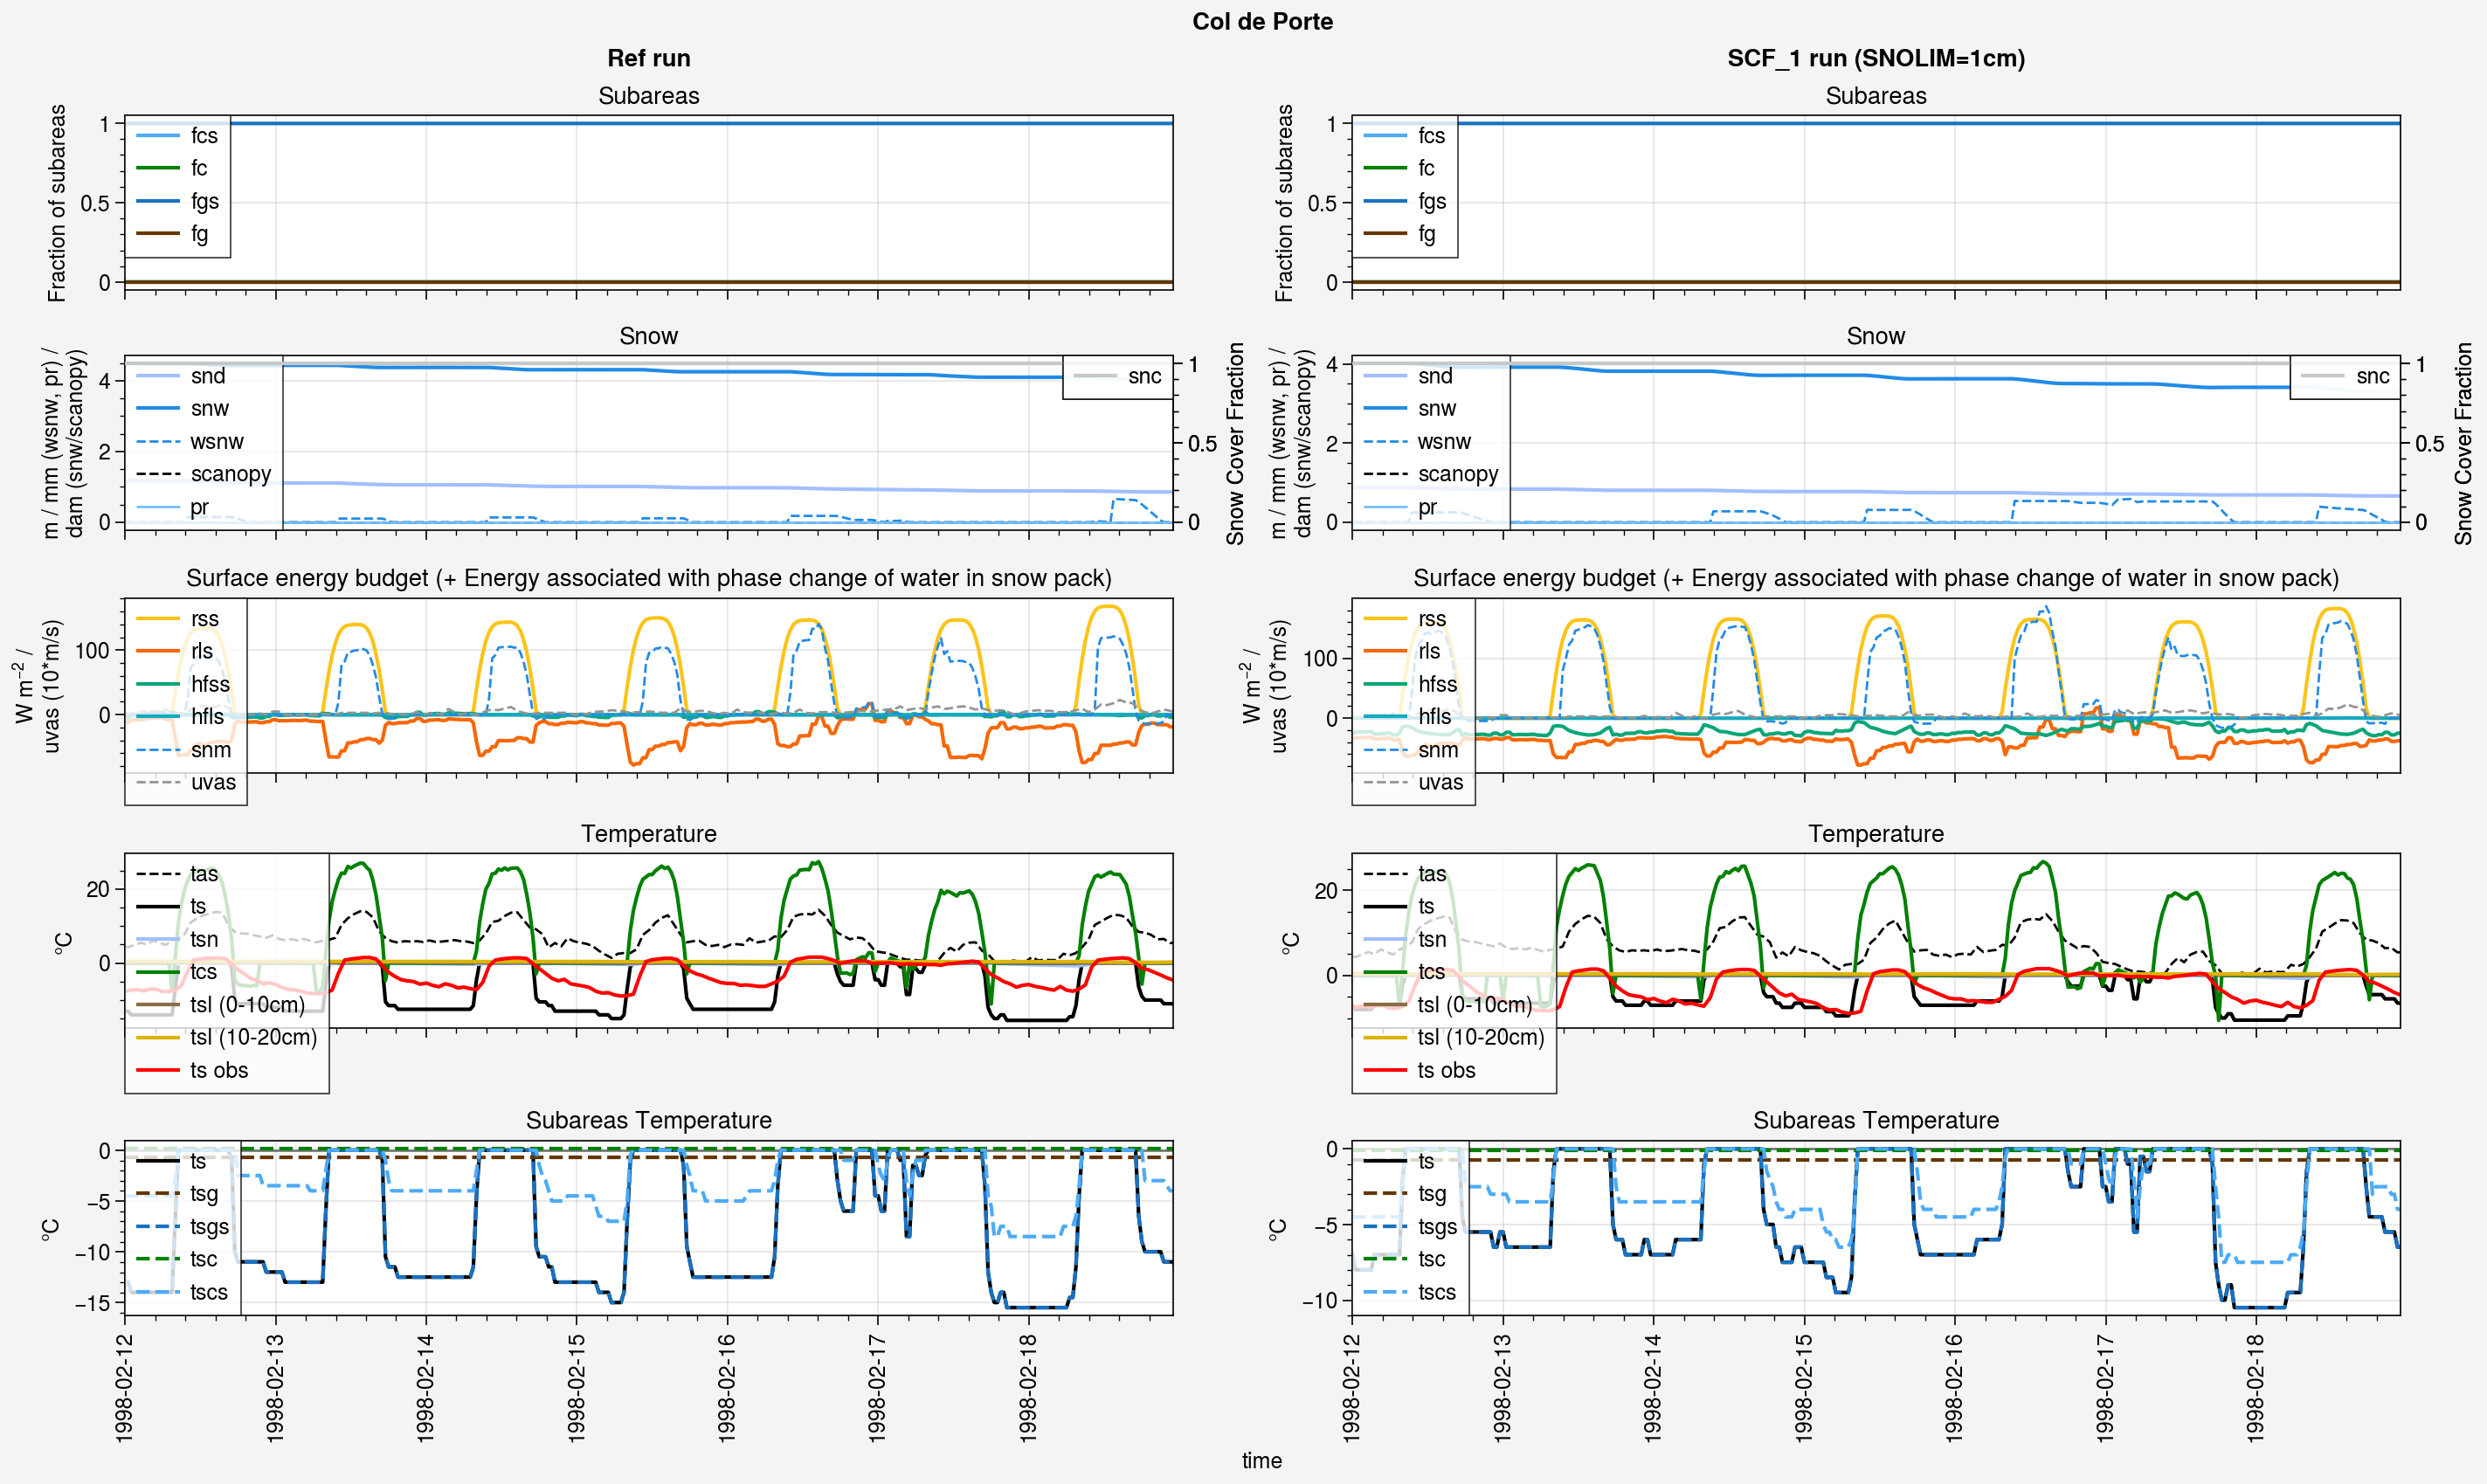

In [254]:
for period in [
    slice('1998-02-12','1998-02-18'),
]:

    fig, axs = pplt.subplots(ncols=2, nrows=5, refaspect=6, refwidth=6, sharey=0)

    for i, ds in enumerate([ds_hh, ds2_hh]):

        #############################
        ### Fractions of subareas ###
        #############################

        variables = {
            'fcs': {'color': 'blue4', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'fc': {'color': 'green', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'fgs': {'color': 'blue8', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'fg': {'color': 'brown', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
        }

        ax = axs[0+i]
        for key in variables.keys():
            ax.plot(((ds[key]-variables[key]['shift'])*variables[key]['factor']).sel(time=period).squeeze(), label=ds[key].name, 
                    color=variables[key]['color'], ls=variables[key]['ls'], lw=variables[key]['lw'])
        ax.legend(ncols=1, loc='ul')
        ax.format(ylabel='Fraction of subareas', title='Subareas', ylim=(-0.05,1.05))

        ##############################
        ### Snow related variables ###
        ##############################

        variables = {
            'snc': {'color': 'silver', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'snd': {'color': 'pastel blue', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'snw': {'color': 'blue6', 'ls': '-', 'lw': 1.5, 'factor': 1e-3*10, 'shift': 0},
            'wsnw': {'color': 'blue6', 'ls': '--', 'lw': 1, 'factor': 1, 'shift': 0},
            'scanopy': {'color': 'k', 'ls': '--', 'lw': 1, 'factor': 1e-3*10, 'shift': 0},
            'pr': {'color': 'blue3', 'ls': '-', 'lw': 1, 'factor': 30, 'shift': 0},
        #     'albs': {'color': 'blue6', 'ls': '--', 'lw': 1, 'factor': 1, 'shift': 0},
    #         'mrron': {'color': 'blue6', 'ls': '--', 'lw': 1, 'factor': 10, 'shift': 0},
        #     'snm': {'color': 'blue8', 'ls': '--', 'lw': 1, 'factor': 1, 'shift': 0},
        }

        ax = axs[2+i]
        for key in list(variables.keys())[1:]:
            ax.plot(((ds[key]-variables[key]['shift'])*variables[key]['factor']).sel(time=period).squeeze(), label=ds[key].name, 
                    color=variables[key]['color'], ls=variables[key]['ls'], lw=variables[key]['lw'])
    #     ax.plot(ds_d.vegHeight.sel(time=period).squeeze(), label=ds_d.vegHeight.name, color='green', ls='-', lw=1)
        ax.legend(ncols=1, loc='ul')
        ax.format(ylabel='m / mm (wsnw, pr) /\ndam (snw/scanopy)', title='Snow')
        ox = ax.alty(label='Snow Cover Fraction')
        for key in list(variables.keys())[0:1]:
            ox.plot(((ds[key]-variables[key]['shift'])*variables[key]['factor']).sel(time=period).squeeze(), label=ds[key].name, 
                    color=variables[key]['color'], ls=variables[key]['ls'], lw=variables[key]['lw'])
        ox.legend(ncols=1, loc='ur')
        ox.format(ylim=(-0.05,1.05))


        ##############################
        ### Surface energy budget ###
        ##############################

        variables = {
            'rss': {'color': 'yellow5', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'rls': {'color': 'orange7', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
        #     'rlds': {'color': 'orange7', 'ls': '--', 'lw': 1, 'factor': 1, 'shift': 0},
            'hfss': {'color': 'teal7', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'hfls': {'color': 'cyan6', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'snm': {'color': 'blue6', 'ls': '--', 'lw': 1, 'factor': 1, 'shift': 0},
            'uvas': {'color': 'gray', 'ls': '--', 'lw': 1, 'factor': 10, 'shift': 0},
        }

        ax = axs[4+i]
        for key in variables.keys():
            ax.plot(((ds[key]-variables[key]['shift'])*variables[key]['factor']).sel(time=period).squeeze(), label=ds[key].name, 
                    color=variables[key]['color'], ls=variables[key]['ls'], lw=variables[key]['lw'])
        ax.hlines(0, ds.sel(time=period).squeeze().time[0], ds.sel(time=period).squeeze().time[-1], color='k', lw=1, alpha=0.5)
        ax.legend(ncols=1, loc='ul')
        ax.format(ylabel='W m$^{-2}$ /\nuvas (10*m/s)', title='Surface energy budget (+ Energy associated with phase change of water in snow pack)')


        ###################
        ### Temperature ###
        ###################

        variables = {
            'tas': {'color': 'k', 'ls': '--', 'lw': 1, 'factor': 1, 'shift': 273.15},
            'ts': {'color': 'k', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 273.15},    
            'tsn': {'color': 'pastel blue', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
            'tcs': {'color': 'green', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 0},
        }

        ax = axs[6+i]
        for key in variables.keys():
            ax.plot(((ds[key]-variables[key]['shift'])*variables[key]['factor']).sel(time=period).squeeze(), label=ds[key].name, 
                    color=variables[key]['color'], ls=variables[key]['ls'], lw=variables[key]['lw'])
        ax.plot((ds.tsl-273.15).sel(layer=1, time=period).squeeze(), label=ds.tsl.name+' (0-10cm)', color='dirt')
        ax.plot((ds.tsl-273.15).sel(layer=2, time=period).squeeze(), label=ds.tsl.name+' (10-20cm)', color='gold')
        ax.plot(ds_h_eval_menard2019.ts.sel(time=period), color='red', label='ts obs')
        ax.hlines(0, ds.sel(time=period).squeeze().time[0], ds.sel(time=period).squeeze().time[-1], color='k', lw=1, alpha=0.5)
        ax.legend(ncols=1, loc='ul')
        ax.format(ylabel='°C', title='Temperature')

        


        ############################
        ### Subareas Temperature ###
        ############################

        variables = {
            'ts': {'color': 'k', 'ls': '-', 'lw': 1.5, 'factor': 1, 'shift': 273.15},

            'tsg': {'color': 'brown', 'ls': '--', 'lw': 1.5, 'factor': 1, 'shift': 273.15},
            'tsgs': {'color': 'blue8', 'ls': '--', 'lw': 1.5, 'factor': 1, 'shift': 273.15},
            'tsc': {'color': 'green', 'ls': '--', 'lw': 1.5, 'factor': 1, 'shift': 273.15},
            'tscs': {'color': 'blue4', 'ls': '--', 'lw': 1.5, 'factor': 1, 'shift': 273.15},
        }

        ax = axs[8+i]
        for key in variables.keys():
            ax.plot(((ds[key]-variables[key]['shift'])*variables[key]['factor']).sel(time=period).squeeze(), label=ds[key].name, 
                    color=variables[key]['color'], ls=variables[key]['ls'], lw=variables[key]['lw'])
        ax.hlines(0, ds.sel(time=period).squeeze().time[0], ds.sel(time=period).squeeze().time[-1], color='k', lw=1, alpha=0.5)
        ax.legend(ncols=1, loc='ul')
        ax.format(ylabel='°C', title='Subareas Temperature')

    fig.suptitle('Col de Porte')
    axs.format(collabels=['Ref run', 'SCF_1 run (SNOLIM=1cm)'])
